<a href="https://colab.research.google.com/github/jyanivaddi/ERA_V1/blob/master/session_6/S6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Add these lines to clone the repository to our notebook

In [1]:
!git clone "https://github.com/jyanivaddi/ERA_V1.git"
!git pull


Cloning into 'ERA_V1'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 145 (delta 60), reused 89 (delta 22), pack-reused 0
Receiving objects: 100% (145/145), 3.16 MiB | 14.89 MiB/s, done.
Resolving deltas: 100% (60/60), done.
fatal: not a git repository (or any of the parent directories): .git


Import all the required libraries. We need to add the "session_6" location to our path so that the scripts are visible to the notebook. 

In [2]:
from __future__ import print_function
import sys
sys.path.append("ERA_V1/session_6")
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
from s6_model import Net, model_summary, model_train, model_test
from s6_utils import load_mnist_data, preview_batch_images, plot_statistics

Show Model Summary and configure GPU

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
mnist_model = Net().to(device)
model_summary(mnist_model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
       BatchNorm2d-2           [-1, 16, 26, 26]              32
            Conv2d-3           [-1, 16, 24, 24]           2,304
       BatchNorm2d-4           [-1, 16, 24, 24]              32
            Conv2d-5           [-1, 16, 22, 22]           2,304
       BatchNorm2d-6           [-1, 16, 22, 22]              32
            Conv2d-7           [-1, 16, 20, 20]           2,304
       BatchNorm2d-8           [-1, 16, 20, 20]              32
            Conv2d-9             [-1, 16, 8, 8]           2,304
      BatchNorm2d-10             [-1, 16, 8, 8]              32
           Conv2d-11             [-1, 16, 6, 6]           2,304
      BatchNorm2d-12             [-1, 16, 6, 6]              32
           Conv2d-13             [-1, 16, 4, 4]           2,304
      BatchNorm2d-14             [-1, 1

Define train and test configurations

In [4]:
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22),],p=0.1),
    transforms.Resize((28,28)),
    transforms.RandomRotation([-15.,15],fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,)),
    ])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(.3081,)),
])

Download dataset

In [5]:
train_data, test_data = load_mnist_data(train_transforms, test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 190676661.23it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 112894402.45it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40639640.12it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 2966447.96it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Define Train and test loaders

In [6]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, **kwargs)


Show Sample Images from the dataset

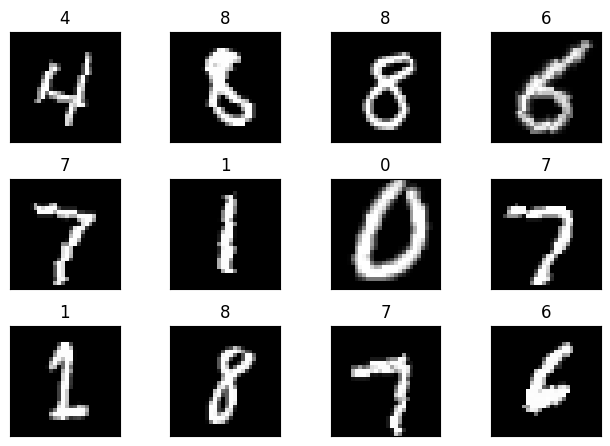

In [7]:
preview_batch_images(train_loader)

Define the optimizer and run training for 20 epochs

In [8]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1, 20):
    model_train(model, device, train_loader, optimizer, train_acc, train_losses)
    model_test(model, device, test_loader, test_acc, test_losses)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.08830613642930984 batch_id=468 Accuracy = 93.27: 100%|██████████| 469/469 [00:27<00:00, 16.99it/s]



Test set: Average loss: 0.0715, Accuracy: 9868/10000 (98.68%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.08080057799816132 batch_id=468 Accuracy = 97.86: 100%|██████████| 469/469 [00:31<00:00, 14.71it/s]



Test set: Average loss: 0.0459, Accuracy: 9888/10000 (98.88%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.09413415193557739 batch_id=468 Accuracy = 98.34: 100%|██████████| 469/469 [00:29<00:00, 16.00it/s]



Test set: Average loss: 0.0385, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.0590209998190403 batch_id=468 Accuracy = 98.45: 100%|██████████| 469/469 [00:27<00:00, 17.20it/s]



Test set: Average loss: 0.0293, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.06570909172296524 batch_id=468 Accuracy = 98.62: 100%|██████████| 469/469 [00:27<00:00, 17.03it/s]



Test set: Average loss: 0.0293, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.059372518211603165 batch_id=468 Accuracy = 98.71: 100%|██████████| 469/469 [00:24<00:00, 18.79it/s]



Test set: Average loss: 0.0261, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.011334902606904507 batch_id=468 Accuracy = 98.73: 100%|██████████| 469/469 [00:24<00:00, 18.99it/s]



Test set: Average loss: 0.0244, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.01647423766553402 batch_id=468 Accuracy = 98.81: 100%|██████████| 469/469 [00:26<00:00, 17.57it/s]



Test set: Average loss: 0.0246, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.014585268683731556 batch_id=468 Accuracy = 98.91: 100%|██████████| 469/469 [00:24<00:00, 19.00it/s]



Test set: Average loss: 0.0213, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.05948342755436897 batch_id=468 Accuracy = 98.96: 100%|██████████| 469/469 [00:24<00:00, 18.77it/s]



Test set: Average loss: 0.0219, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.011714905500411987 batch_id=468 Accuracy = 98.92: 100%|██████████| 469/469 [00:24<00:00, 18.90it/s]



Test set: Average loss: 0.0198, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.004926732275635004 batch_id=468 Accuracy = 98.96: 100%|██████████| 469/469 [00:25<00:00, 18.38it/s]



Test set: Average loss: 0.0201, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.04782390221953392 batch_id=468 Accuracy = 99.01: 100%|██████████| 469/469 [00:24<00:00, 18.83it/s]



Test set: Average loss: 0.0186, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.037377603352069855 batch_id=468 Accuracy = 99.00: 100%|██████████| 469/469 [00:26<00:00, 18.00it/s]



Test set: Average loss: 0.0200, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.11716871708631516 batch_id=468 Accuracy = 99.05: 100%|██████████| 469/469 [00:24<00:00, 18.93it/s]



Test set: Average loss: 0.0164, Accuracy: 9953/10000 (99.53%)

Adjusting learning rate of group 0 to 1.0000e-03.


loss=0.015733564272522926 batch_id=468 Accuracy = 99.24: 100%|██████████| 469/469 [00:25<00:00, 18.65it/s]



Test set: Average loss: 0.0148, Accuracy: 9955/10000 (99.55%)

Adjusting learning rate of group 0 to 1.0000e-03.


loss=0.03545043244957924 batch_id=468 Accuracy = 99.32: 100%|██████████| 469/469 [00:25<00:00, 18.61it/s]



Test set: Average loss: 0.0154, Accuracy: 9955/10000 (99.55%)

Adjusting learning rate of group 0 to 1.0000e-03.


loss=0.00995565950870514 batch_id=468 Accuracy = 99.33: 100%|██████████| 469/469 [00:25<00:00, 18.75it/s]



Test set: Average loss: 0.0152, Accuracy: 9958/10000 (99.58%)

Adjusting learning rate of group 0 to 1.0000e-03.


loss=0.013842481188476086 batch_id=468 Accuracy = 99.37: 100%|██████████| 469/469 [00:26<00:00, 17.74it/s]



Test set: Average loss: 0.0152, Accuracy: 9956/10000 (99.56%)

Adjusting learning rate of group 0 to 1.0000e-03.


Plot the accuracy and losses for train and test

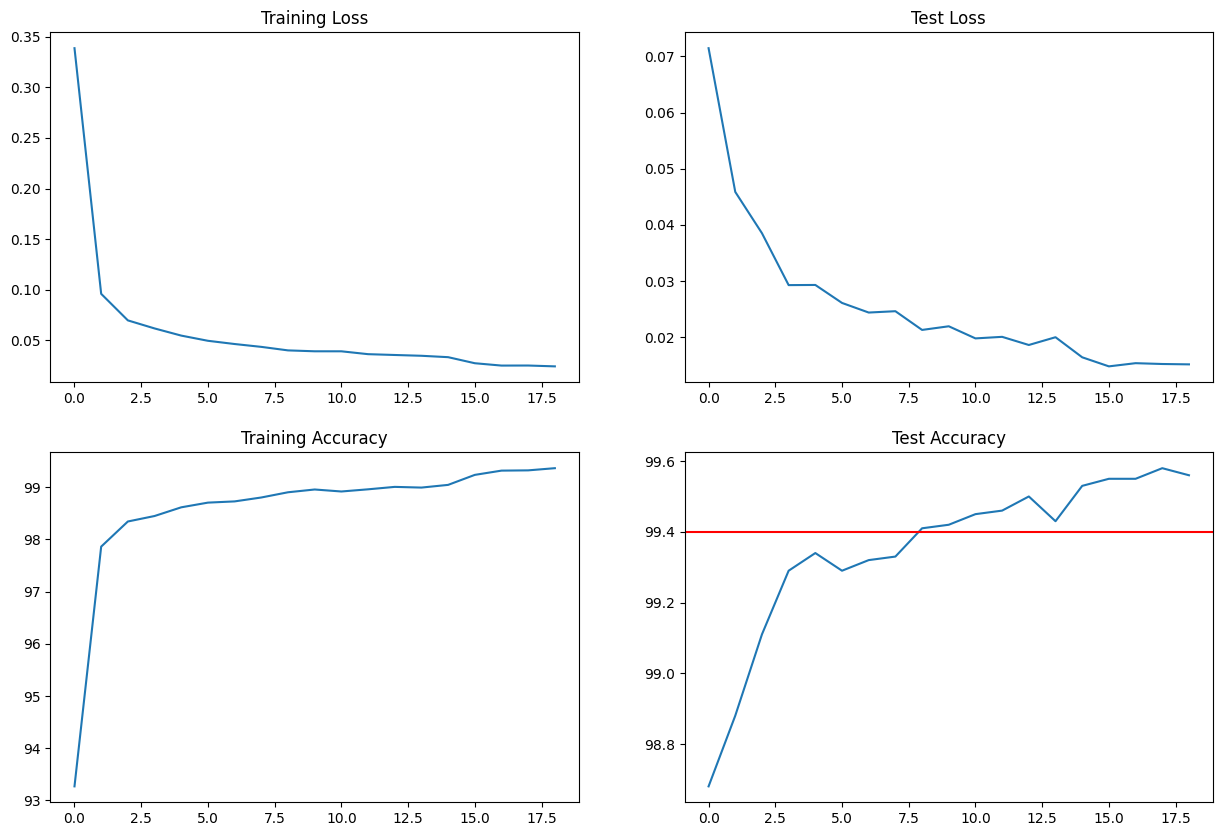

In [9]:
plot_statistics(train_losses, train_acc, test_losses, test_acc)
